In [5]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [6]:
target1 = pd.read_csv('J111443.21+131118.8.csv')
opflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

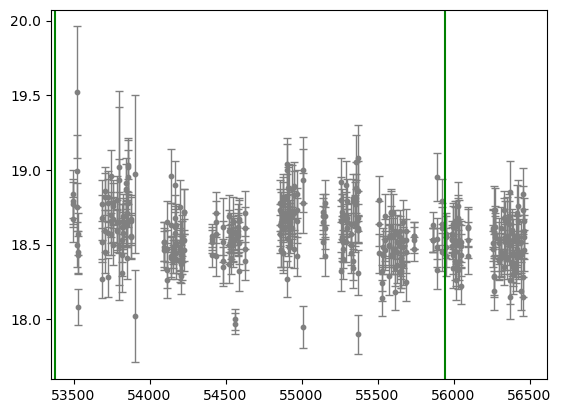

In [7]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 55945, color ='g')	
plt.axvline(x= 53379, color ='g')	

In [8]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

426

In [9]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
#diff

In [10]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >50:
        sum += 1
        seppt.append(j)
print(sum)
seppt

9


[11, 65, 105, 149, 201, 209, 253, 305, 353]

In [11]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[12, 54, 40, 44, 52, 8, 44, 52, 48, 73]

In [12]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [13]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
8,J111443.21+131118.8,1112060040032,18.77,0.15,168.67977,13.18854,53498.16042,0
9,J111443.21+131118.8,1112060040032,18.79,0.15,168.68002,13.18852,53498.16688,0
10,J111443.21+131118.8,1112060040032,18.67,0.15,168.67991,13.18841,53498.17339,0
11,J111443.21+131118.8,1112060040032,18.84,0.16,168.68006,13.18859,53498.17993,0
12,J111443.21+131118.8,1112060040032,18.75,0.16,168.67993,13.18861,53520.18470,0
...,...,...,...,...,...,...,...,...
369,J111443.21+131118.8,1112060040032,18.73,0.16,168.67983,13.18891,56454.19462,0
370,J111443.21+131118.8,1112060040032,18.66,0.15,168.68012,13.18869,56464.16180,0
371,J111443.21+131118.8,1112060040032,18.55,0.15,168.67991,13.18897,56464.16688,0
372,J111443.21+131118.8,1112060040032,18.46,0.14,168.68002,13.18893,56464.17199,0


In [14]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53529.18393

In [15]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53905.19221

In [16]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54229.23772

In [17]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54625.20007

In [18]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55006.1873

In [19]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55154.49997

In [20]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55370.18147

In [21]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

55736.19797

In [22]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56096.17958

In [23]:
df_10 = data.iloc[seppt[8]+1:,:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56464.17705

In [25]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g1.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g2.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g3.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g4.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g5.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g6.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g7.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g8.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g9.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g10 = pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g10.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [26]:
med

[18.75, 18.65, 18.47, 18.53, 18.69, 18.65, 18.64, 18.48, 18.53, 18.52]

In [27]:
centerMJD

[53514.63457454546,
 53793.26252037736,
 54167.88907153846,
 54528.48609116279,
 54912.42839705882,
 55148.22689,
 55316.961703023255,
 55612.19707411764,
 55984.82934042553,
 56363.91855902778]

In [28]:
medMJD


[53520.19112,
 53797.32509,
 54168.44033,
 54537.29991,
 54911.27869,
 55143.53488,
 55324.22154,
 55617.44776,
 55999.26055,
 56366.755594999995]

In [29]:
medopflux


[0.0001142243418814581,
 0.00012524513960841428,
 0.00014783045139500061,
 0.0001398823810531792,
 0.00012071466876184395,
 0.00012524513960841428,
 0.00012640407633900987,
 0.000146475086356202,
 0.0001398823810531792,
 0.00014117674734122354]

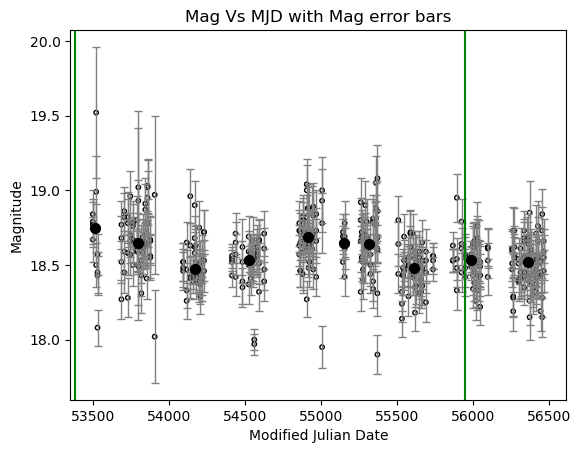

In [30]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 55945, color ='g')	
plt.axvline(x= 53379, color ='g')		

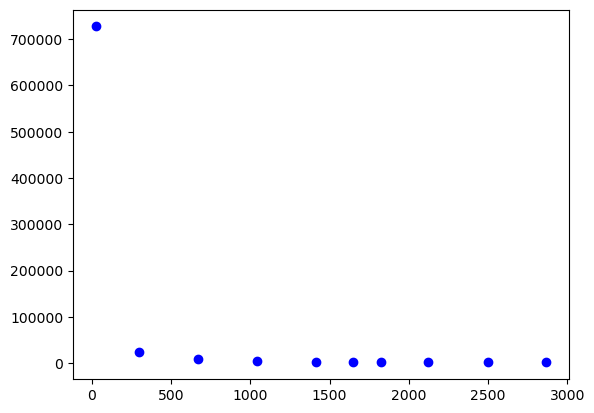

In [70]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - 53498.16042	 for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [75]:
popt, pcov = curve_fit(f, x, med, maxfev =5000, bounds = ([-10**10,-10,-30],[10**10,10,30]))


In [76]:
popt

array([ 0.66650428, -0.32796704, 18.50868533])

In [77]:
pcov

array([[ 1.37716628, -1.05140536,  0.33825288],
       [-1.05140536,  0.8729387 , -0.29219958],
       [ 0.33825288, -0.29219958,  0.10026038]])

In [78]:
popt, pcov = curve_fit(f, x, med,bounds=([-10**12,-10**3,-10**12],[10**12,10**3,10**12]), maxfev =5000)

In [79]:
popt

array([ 0.66649598, -0.32796038, 18.50868314])

In [80]:
pcov

array([[ 1.37704934, -1.05135207,  0.33825045],
       [-1.05135207,  0.87292902, -0.29220932],
       [ 0.33825045, -0.29220932,  0.10026807]])

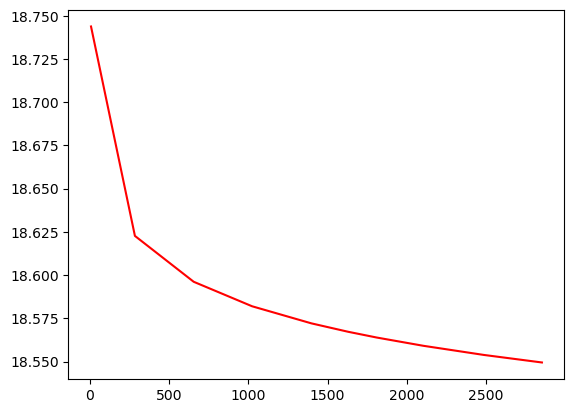

In [48]:
plt.plot(x, f(x,-1.59699808e+02,  1.98248187e-04,  1.78501337e+02), 'r-')

In [62]:
popt, pcov = curve_fit(f, target1.MJD - 53498.16042	, target1.Mag, )

In [63]:
popt

array([-0.0207842 ,  0.29868683, 18.74802781])

In [64]:
pcov

array([[ 0.0016361 ,  0.00804646, -0.00357717],
       [ 0.00804646,  0.04003219, -0.01699065],
       [-0.00357717, -0.01699065,  0.00869227]])

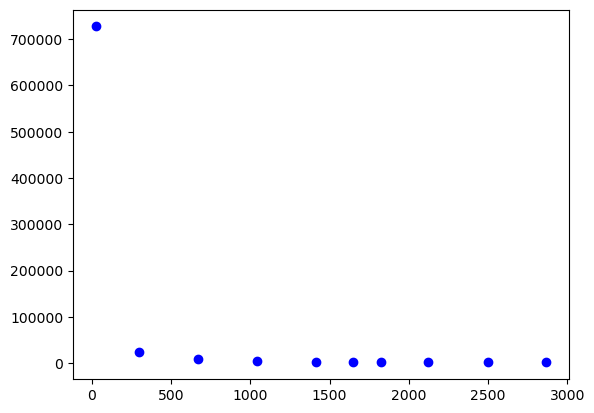

In [96]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - 53498.16042	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [97]:
popt,pcov = curve_fit(g, x, med)

In [98]:
popt

array([ 0.89649846, -0.061983  ])

In [99]:
pcov

array([[ 0.02698228, -0.00436008],
       [-0.00436008,  0.00074725]])

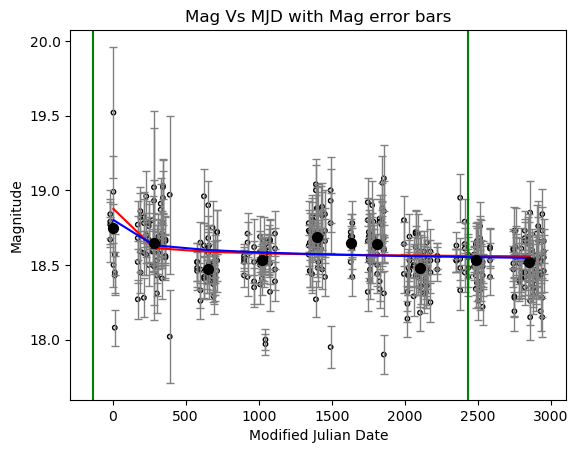

In [101]:
x = np.array([item - 53514 for item in medMJD])
MJD = np.array([item - 53514 for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 55945-53514, color ='g')	
plt.axvline(x= 53379-53514, color ='g')
plt.plot(x, f(x,0.66650428, -0.32796704, 18.50868533), 'r-', zorder=3)
plt.plot(x, g(x, 0.89649846, -0.061983 ), 'b-', zorder=3)
#plt.plot(x, f(x, 0.66649567, -0.32796038, ), 'y-', zorder=3)
#plt.plot(x, f(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



In [156]:
 np.sqrt(np.diag(pcov))

array([0.9677483 , 0.71655685, 1.2129427 ])

In [163]:
mase(med,func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01))

0.7253446768437793

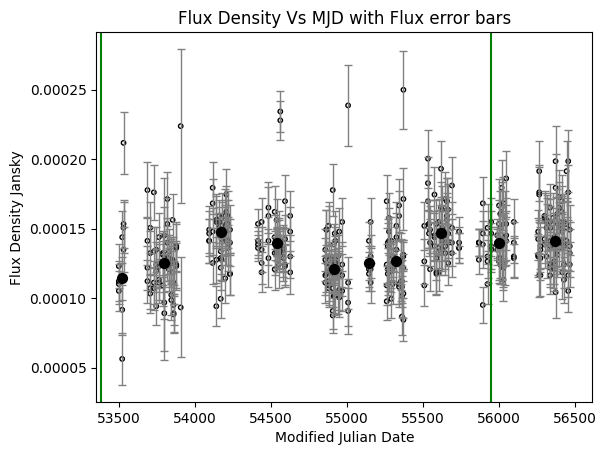

In [127]:
plt.scatter(target1.MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(medMJD,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

plt.axvline(x= 55945, color ='g')	
plt.axvline(x= 53379, color ='g')

In [110]:
popt, pcov = curve_fit(f, x, medopflux, maxfev =5000)

In [111]:
popt

array([ 0.01588298,  0.00023261, -0.01577484])

In [112]:
popt, pcov = curve_fit(f, x, medopflux,bounds=([-10**12,-10,0],[10**12,10,0.003]))

In [113]:
popt

array([-5.36516534e-05, -1.22346164e-01,  1.57132135e-04])

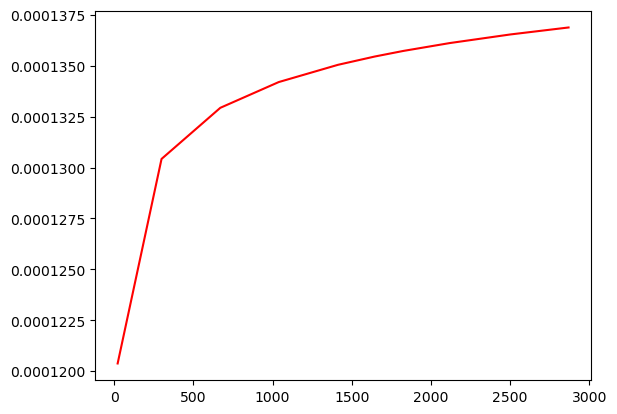

In [117]:
plt.plot(x, f(x,-5.36516534e-05, -1.22346164e-01,  1.57132135e-04), 'r-')

In [124]:
popt, pcov = curve_fit(f, target1.MJD - 53498, opflux, maxfev =5000)

In [125]:
popt

array([3.56388624e-14, 2.48328378e+00, 1.31861485e-04])

In [126]:
pcov

array([[ 1.78098848e-25, -6.13697667e-13, -7.20820345e-19],
       [-6.13697667e-13,  2.11556144e+00,  2.44902940e-06],
       [-7.20820345e-19,  2.44902940e-06,  5.64489277e-12]])

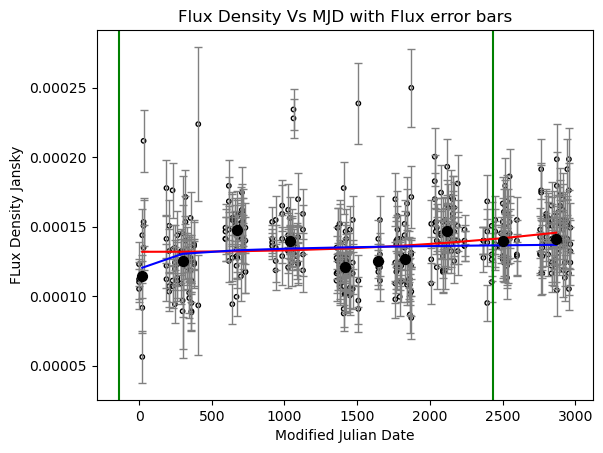

In [127]:
x = np.array([item - 53498.1604 for item in medMJD])
MJD = np.array([item - 53498.1604 for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

plt.axvline(x= 55945-53514, color ='g')	
plt.axvline(x= 53379-53514, color ='g')
plt.plot(x, f(x,*popt), 'r-', zorder=3)
plt.plot(x, f(x,-5.36516534e-05, -1.22346164e-01,  1.57132135e-04), 'b-', zorder=3)
#plt.plot(x, func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)

In [140]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [146]:
actual = medopflux
predicted1 = func(x,-5.36516262e-05, -1.22346300e-01,  1.57132102e-04)
predicted2 = func(x,0.01887103,  0.00019581, -0.01876289)



In [147]:
mase(actual,predicted1)

0.7396127933310956

In [148]:
mase(actual,predicted2)

0.7311806579575137

In [ ]:
resid = opflux - func(x,0.01887103,  0.00019581, -0.01876289)
chi2 = sum((resid / func(x,0.01887103,  0.00019581, -0.01876289))**2)
chi2_red = chi2 / dof
